In [289]:
from IPython.display import display, Markdown

display(Markdown("""
## **Loan Prediction Dataset – Logistic Regression Model**
**Target Variable:** Loan_Status
"""))


## **Loan Prediction Dataset – Logistic Regression Model**  
**Target Variable:** Loan_Status


In [130]:
import pandas as pd
import numpy as np

file_path='https://raw.githubusercontent.com/ujwaldeepkadiyam/Data_Science_and_Machine_Learning/refs/heads/main/Datasets/Loan_Prediction_Dataset/Loan_Prediction_Train.csv'

loan=pd.read_csv(file_path)
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**DATA INSPECTION**

In [131]:
print(loan.shape)
print(loan.info())

(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [132]:
loan.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [133]:
#As per my observation,there are some null values in categorical variable as well as continous variable
#Loan_amount_term signifies loan term in months
#Here in this dataset "Dependent" variable showing as object data type which means its a categorical data type not a discrete data type as per business problem
#Categorical variable = gender,married,education,self_employed,property area,credit history
#Countinous variable = applicantincome,co applicant income,loan amount,property area,loan_status
#Discreate variable== Loan amount term

**EDA FOR CATEGORICAL VARIABLES**

In [134]:
loan['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [135]:
loan['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [136]:
loan['Education'].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


In [137]:
loan['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [138]:
loan['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82


In [139]:
loan['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [140]:
loan['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


In [141]:
#As observed, we have null values in the categorical variables (Gender,Married,Dependents,Self employed,Credit history) mentioned above
#We have to replace +3 to 3 in the variable "Dependent" to avoid any bias and change its data type from object to int

**EDA FOR CONTINOUS VARIABLE**

In [142]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: >

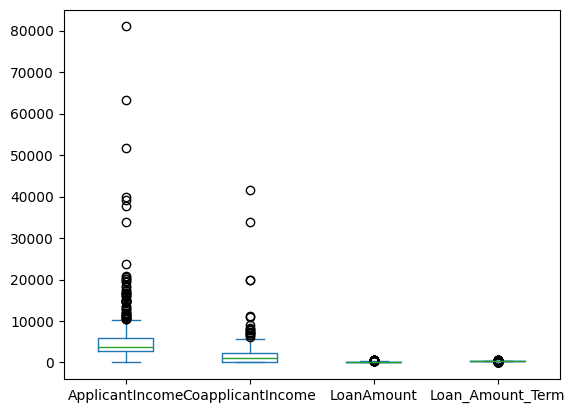

In [143]:
loan[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].plot(kind='box')

In [144]:
loan[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0.1,2216.1,0.0,71.0,294.0
0.2,2605.4,0.0,95.0,360.0
0.3,3050.4,0.0,108.0,360.0
0.4,3406.8,0.0,116.0,360.0
0.5,3812.5,1188.5,128.0,360.0
0.6,4343.6,1689.6,137.0,360.0
0.7,5185.6,2083.0,158.0,360.0
0.8,6252.4,2535.0,182.0,360.0
0.9,9459.9,3782.2,235.8,360.0
1.0,81000.0,41667.0,700.0,480.0


**APPLICANT INCOME**

In [145]:
loan['ApplicantIncome'].quantile([0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

,ApplicantIncome
0.90,9459.90
0.91,9940.90
0.92,10397.24
0.93,11155.36
0.94,12110.00
0.95,14583.00
0.96,15364.32
0.97,16682.25
0.98,19666.04
0.99,32540.41


In [146]:
loan["ApplicantIncome"].quantile([0,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.0075,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4])

,ApplicantIncome
0.0000,150.000
0.0010,186.780
0.0020,256.556
0.0030,382.834
0.0040,519.508
0.0050,646.885
0.0060,664.662
0.0070,768.866
0.0075,868.785
0.0080,968.704


In [147]:
#Calculating IQR,Lower bound,Upper bound

q1=loan['ApplicantIncome'].quantile(0.25)
q3=loan['ApplicantIncome'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

print(iqr)
print(lower_bound)
print(upper_bound)

2917.5
-1498.75
10171.25


In [148]:
#968.04
#11155.36

**COAPPLICANT INCOME**

In [149]:
loan['CoapplicantIncome'].quantile([0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])

,CoapplicantIncome
0.900,3782.200
0.910,3984.020
0.920,4230.560
0.930,4416.000
0.940,4596.100
0.950,4997.400
0.960,5397.040
0.970,5682.670
0.980,7198.560
0.990,8895.890


In [150]:
#Calculating IQR,Lower bound,Upper bound

q1=loan['CoapplicantIncome'].quantile(0.25)
q3=loan['CoapplicantIncome'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

print(iqr)
print(lower_bound)
print(upper_bound)

2297.25
-3445.875
5743.125


In [151]:
#10999.872

**LOAN AMOUNT**

In [152]:
loan['LoanAmount'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.991,0.992,0.993,0.994,0.995,0.996,0.997,0.998,0.999,1])

,LoanAmount
0.900,235.800
0.910,245.620
0.920,257.160
0.930,260.000
0.940,277.160
0.950,297.800
0.960,316.800
0.970,362.700
0.980,443.920
0.990,496.360


In [153]:
loan['LoanAmount'].quantile([0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

,LoanAmount
0.90,235.80
0.91,245.62
0.92,257.16
0.93,260.00
0.94,277.16
0.95,297.80
0.96,316.80
0.97,362.70
0.98,443.92
0.99,496.36


In [154]:
loan['LoanAmount'].mean()

np.float64(146.41216216216216)

In [155]:
loan['LoanAmount'].median()

128.0

In [156]:
loan['LoanAmount'].quantile([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,1])

,LoanAmount
0.00,9.00
0.01,30.00
0.02,43.64
0.03,47.73
0.04,53.64
0.05,56.00
0.06,60.00
0.07,66.00
0.08,67.84
0.09,70.00


In [157]:
#Calculating IQR,Lower bound,Upper bound

q1=loan['LoanAmount'].quantile(0.25)
q3=loan['LoanAmount'].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

print(iqr)
print(lower_bound)
print(upper_bound)

68.0
-2.0
270.0


In [158]:
#30
#443.92

<Axes: >

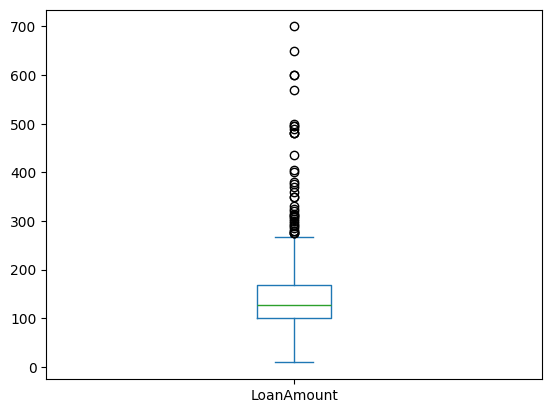

In [159]:
loan['LoanAmount'].plot(kind='box')


In [160]:
#In the above inspection, datapoints > 444 and datapoints < 30 shall be treated as outliers and must be replaced with median

**EDA FOR DISCRETE VARIABLE (LOAN AMOUNT TERM)**

In [161]:
loan['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [162]:
#As per the inspection,column "Loan amount term" is given in the order of months.

**EDA FINDINGS**

In [163]:
#For continous variables like Loan amount,Applicant income,Coapplicant income, I have calculated IQR to view upper bound and lower bound for detecting outliers.
#For discrete variable like "Loan amount term" which is given in the order of months shall be treated as discrete due to absence of range.
#For categorical variable "Dependents" having +3 as a datapoint should be created as flag variable where 3+ is flagged as 1 less than 3 as 0

**2)DATA CLEANING (CATEGORICAL VARIABLES)**

In [164]:
loan.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [165]:
loan_new=loan.copy()
loan_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [166]:
cat_col=['Gender', 'Married','Dependents','Self_Employed','Credit_History']

for i in cat_col:
    loan_new[i].fillna(loan_new[i].mode()[0],inplace=True)

/tmp/ipython-input-1929869556.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_new[i].fillna(loan_new[i].mode()[0],inplace=True)


In [167]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [168]:
#Creating flag variable for "Dependent"

In [169]:
loan_new['Dependents_Flag']=np.where(loan_new['Dependents']=='3+','1','0')

In [170]:
loan_new['Dependents_Flag'].value_counts()

,count
Dependents_Flag,
0,563
1,51


In [171]:
loan_new['Dependents_Flag'].astype(int)

,Dependents_Flag
0,0
1,0
2,0
3,0
4,0
...,...
609,0
610,1
611,0
612,0


**DATA CLEANING(CONTINOUS VARIABLE)**

**Applicant Income**

In [172]:
loan_new.loc[loan_new['ApplicantIncome']>11155.36,'ApplicantIncome']=loan_new['ApplicantIncome'].median()

/tmp/ipython-input-2573492520.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3812.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  loan_new.loc[loan_new['ApplicantIncome']>11155.36,'ApplicantIncome']=loan_new['ApplicantIncome'].median()


In [173]:
loan_new.loc[loan_new['ApplicantIncome']<968.04,'ApplicantIncome']=loan_new['ApplicantIncome'].median()

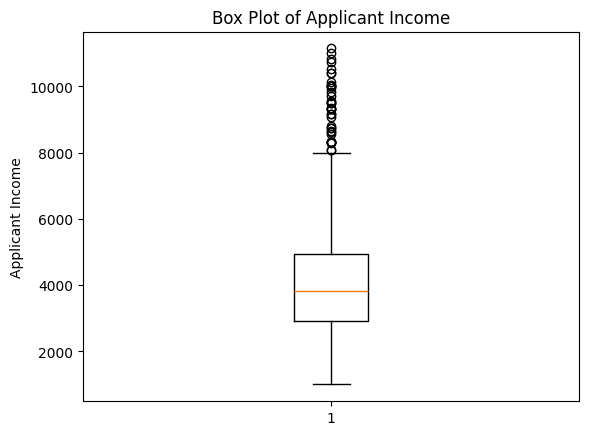

In [174]:
# plot box plot for column applicant income

import matplotlib.pyplot as plt

plt.boxplot(loan_new['ApplicantIncome'])
plt.title('Box Plot of Applicant Income')
plt.ylabel('Applicant Income')
plt.show()

In [175]:
#Here variable "Applicant income" has still some outliers but decided to keep on the account that some datapoints still holds validity for business perspective inspite of major drift

**Coapplicant Income**

In [176]:
loan_new.loc[loan_new['CoapplicantIncome']>10999.872,'CoapplicantIncome']=loan_new['CoapplicantIncome'].median()

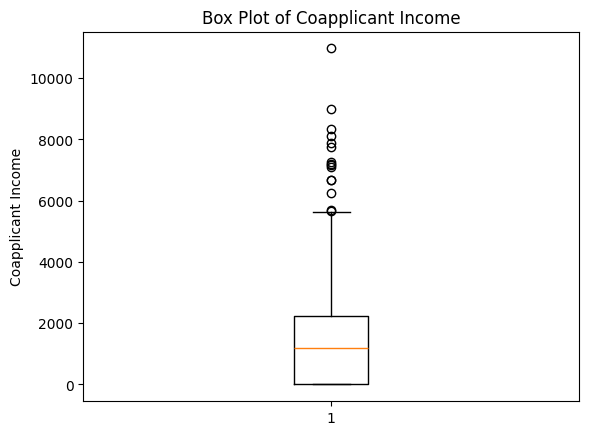

In [177]:
# plot box plot for column coapplicant income

plt.boxplot(loan_new['CoapplicantIncome'])
plt.title('Box Plot of Coapplicant Income')
plt.ylabel('Coapplicant Income')
plt.show()

**Loan Amount**

In [178]:
loan_new.loc[loan_new['LoanAmount']>444,'LoanAmount']=loan_new['LoanAmount'].median()

In [179]:
loan_new.loc[loan_new['LoanAmount']<30,'LoanAmount']=loan_new['LoanAmount'].median()

<Axes: >

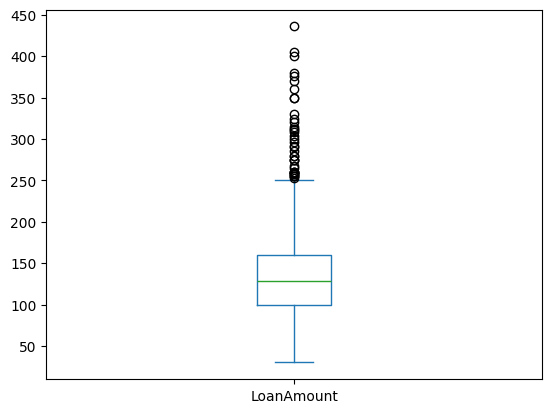

In [180]:
# plot box plot for column Loan Amount

loan_new['LoanAmount'].plot(kind='box')

In [181]:
# fill null values for column loan amount with median

loan_new['LoanAmount'].fillna(loan_new['LoanAmount'].median(),inplace=True)

In [182]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Dependents_Flag    614 non-null    object 
dtypes: float64(5), object(9)
memory usage: 67.3+ KB


In [183]:
loan_new['Loan_Amount_Term'].median()

360.0

In [184]:
loan_new['Loan_Amount_Term'].mode()

,Loan_Amount_Term
0,360.0


In [185]:
loan_new['Loan_Amount_Term'].fillna(loan_new['Loan_Amount_Term'].mode()[0],inplace=True)

/tmp/ipython-input-11747856.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_new['Loan_Amount_Term'].fillna(loan_new['Loan_Amount_Term'].mode()[0],inplace=True)


In [186]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Dependents_Flag    614 non-null    object 
dtypes: float64(5), object(9)
memory usage: 67.3+ KB


In [187]:
loan_new['Loan_Amount_Term']=loan_new['Loan_Amount_Term']/12

In [188]:
loan_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_Flag
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,30.0,1.0,Urban,Y,0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,30.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,30.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,30.0,1.0,Urban,Y,0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,30.0,1.0,Urban,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,30.0,1.0,Rural,Y,0
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,15.0,1.0,Rural,Y,1
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,30.0,1.0,Urban,Y,0
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,30.0,1.0,Urban,Y,0


In [189]:
loan_new['Log_Loan_Amount_Term']=np.log(loan_new['Loan_Amount_Term'])

In [190]:
loan_new['Log_Loan_Amount_Term'].value_counts()

,count
Log_Loan_Amount_Term,
3.401197,526
2.708050,44
3.688879,15
3.218876,13
1.945910,4
2.995732,4
2.302585,3
1.609438,2
1.098612,2


In [191]:
#In the above, I transformed the variable "Loan Amount Term" into "Log Loan Amount Term" by using log transformation to ensure less spread between datapoints.This ensures better accuracy of the model

In [192]:
# Removing the variable "Loan_ID" as it is non-informative and wont contribute for prediction
# Removing the variable "Loan_Amount_Term" as another variable of log transformed has been created

In [193]:
loan_new.drop(columns=['Loan_ID','Loan_Amount_Term'],inplace=True)

In [194]:
loan_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Dependents_Flag,Log_Loan_Amount_Term
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,1.0,Urban,Y,0,3.401197
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,1.0,Rural,N,0,3.401197
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,1.0,Urban,Y,0,3.401197
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,1.0,Urban,Y,0,3.401197
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,1.0,Urban,Y,0,3.401197
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900.0,0.0,71.0,1.0,Rural,Y,0,3.401197
610,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,1.0,Rural,Y,1,2.708050
611,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,1.0,Urban,Y,0,3.401197
612,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,1.0,Urban,Y,0,3.401197


**DATA NORMALIZATION**

In [195]:
loan_new=loan_new.iloc[:,[0,1,3,2,-2,4,5,6,9,8,-1,7,-3]]

In [196]:
loan_new

,Gender,Married,Education,Dependents,Dependents_Flag,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Credit_History,Log_Loan_Amount_Term,LoanAmount,Loan_Status
0,Male,No,Graduate,0,0,No,5849.0,0.0,Urban,1.0,3.401197,128.0,Y
1,Male,Yes,Graduate,1,0,No,4583.0,1508.0,Rural,1.0,3.401197,128.0,N
2,Male,Yes,Graduate,0,0,Yes,3000.0,0.0,Urban,1.0,3.401197,66.0,Y
3,Male,Yes,Not Graduate,0,0,No,2583.0,2358.0,Urban,1.0,3.401197,120.0,Y
4,Male,No,Graduate,0,0,No,6000.0,0.0,Urban,1.0,3.401197,141.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,0,0,No,2900.0,0.0,Rural,1.0,3.401197,71.0,Y
610,Male,Yes,Graduate,3+,1,No,4106.0,0.0,Rural,1.0,2.708050,40.0,Y
611,Male,Yes,Graduate,1,0,No,8072.0,240.0,Urban,1.0,3.401197,253.0,Y
612,Male,Yes,Graduate,2,0,No,7583.0,0.0,Urban,1.0,3.401197,187.0,Y


**ENCODING**

In [197]:
#encoded male with 1 and female with zero
loan_new["Gender"]=np.where(loan_new["Gender"]=="Male",1,0)
#encoded graduate with 1 and not graduate with 0
loan_new["Education"]=np.where(loan_new["Education"]=="Graduate",1,0)
#encoded yes with 1 and no with 0
loan_new["Married"]=np.where(loan_new["Married"]=="Yes",1,0)
#encoded +3 with 4
loan_new["Dependents"]=np.where(loan_new["Dependents"]=="0",0,np.where(loan_new["Dependents"]=="1",1,np.where(loan_new["Dependents"]=="2",2,3,)))
#encoded yes with 1 and no with 0
loan_new["Self_Employed"]=np.where(loan_new["Self_Employed"]=="Yes",1,0)
#encoded urban with 0,semi urban with 1 and rural with 2
loan_new["Property_Area"]=np.where(loan_new["Property_Area"]=="Urban",0,np.where(loan_new["Property_Area"]=="Semiurban",1,2))
#encoded yes with 1 and no with 0
loan_new["Loan_Status"]=np.where(loan_new["Loan_Status"]=="Y",1,0)

In [198]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

**TRAIN-TEST SPLIT**

In [277]:
X= loan_new.drop(columns=['Loan_Status'])
Y=loan_new["Loan_Status"]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (491, 12)
x_test (123, 12)
y_train (491,)
y_test (123,)


In [200]:
loan_new

,Gender,Married,Education,Dependents,Dependents_Flag,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Credit_History,Log_Loan_Amount_Term,LoanAmount,Loan_Status
0,1,0,1,0,0,0,5849.0,0.0,0,1.0,3.401197,128.0,1
1,1,1,1,1,0,0,4583.0,1508.0,2,1.0,3.401197,128.0,0
2,1,1,1,0,0,1,3000.0,0.0,0,1.0,3.401197,66.0,1
3,1,1,0,0,0,0,2583.0,2358.0,0,1.0,3.401197,120.0,1
4,1,0,1,0,0,0,6000.0,0.0,0,1.0,3.401197,141.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,0,0,2900.0,0.0,2,1.0,3.401197,71.0,1
610,1,1,1,3,1,0,4106.0,0.0,2,1.0,2.708050,40.0,1
611,1,1,1,1,0,0,8072.0,240.0,0,1.0,3.401197,253.0,1
612,1,1,1,2,0,0,7583.0,0.0,0,1.0,3.401197,187.0,1


In [201]:
x_train.dtypes

,0
Gender,int64
Married,int64
Education,int64
Dependents,int64
Dependents_Flag,object
Self_Employed,int64
ApplicantIncome,float64
CoapplicantIncome,float64
Property_Area,int64
Credit_History,float64


In [220]:
x_train['Dependents_Flag'] = x_train['Dependents_Flag'].astype(int)

**SCALING**

In [278]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [204]:
#Scaling has been done to standardize feature value by assigning mean = 0 and standard deviation = 1 for model to learn better and faster.

**BUILDING THE MODEL**

In [279]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [253]:
y_train.value_counts()

,count
Loan_Status,
1,337
0,154


In [210]:
#Due to class imbalance, I performed stratified sampling on the account that there is proper distribution of both classes in train and test data

**PREDICTING THE TARGET VARIABLE "LOAN STATUS"**

In [280]:
y_pred = model.predict(x_test_scaled)

**CALCULATING ACCURACY SCORE AND CONFUSION MATRIX**

In [286]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8536585365853658
[[21 17]
 [ 1 84]]


**ILLUSTRATION**

In [287]:
y_pred = model.predict([[ 0.46405445,-1.38033526,0.54046763,-0.74858624,-0.29374,-0.39407375,
  1.04062279,-0.80330068,1.30969601,-2.51562283,0.26626005,-0.34647284]])

In [273]:
print(x_test_scaled[0])

[ 0.46405445 -1.38033526  0.54046763 -0.74858624 -0.29374    -0.39407375
  1.04062279 -0.80330068  1.30969601 -2.51562283  0.26626005 -0.34647284]


In [288]:
y_pred

array([0])

In [282]:
Project = model.predict([[0,1,1,0,0,0,10000,0,0,1,1,50000]])

In [283]:
Project

array([0])

In [284]:
Project2 = model.predict([[0,1,0,0,0,0,100,0,0,0,1,50000]])

In [285]:
Project2

array([0])

In [290]:
coef_df= pd.DataFrame({
    "Feature": x_train.columns,
    "Coefficient": model.coef_[0]
})
print(f"intercept={model.intercept_}")
print(coef_df)

intercept=[0.81173611]
                 Feature  Coefficient
0                 Gender    -0.089706
1                Married     0.256447
2              Education     0.191733
3             Dependents     0.135099
4        Dependents_Flag    -0.007727
5          Self_Employed    -0.039442
6        ApplicantIncome    -0.044744
7      CoapplicantIncome     0.056884
8          Property_Area    -0.042153
9         Credit_History     1.238708
10  Log_Loan_Amount_Term     0.073598
11            LoanAmount    -0.181705


In [212]:
#These are the co-efficients and intercept for the variable

# **END OF PROJECT**